In [164]:
import json
import os
from urllib.request import urlopen
import pickle
from langdetect import detect
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'white', palette = 'colorblind')

In [165]:
sns.__version__

'0.13.2'

# Load pickle file from url 

In [233]:
# Access the url using the variable name defined in the .env file
load_dotenv()
db_file_path = os.getenv('DB_FILE_PATH')

# Load pickle file from url 
with urlopen(db_file_path) as db:
    pickle_db = pickle.load(db)

In [255]:
pickle_db.keys()

dict_keys(['jobs_by_id', 'jobs_by_scrape_date', 'jobs_by_post_date', 'jobs_by_search_keyword'])

In [224]:
def get_jobs_by_keyword(pickle_db, keyword):
    job_list =[]
    job_ids = pickle_db['jobs_by_search_keyword'].get(keyword, set())
    for job_id in job_ids:
        job_details = pickle_db['jobs_by_id'][job_id]
        job_list.append(job_details)
    return job_list

def jobs_to_dataframe(jobs):
    return pd.DataFrame(jobs)

In [225]:
pickle_db['jobs_by_search_keyword'].keys()

dict_keys(['data scientist', 'data analyst', 'frontend developer'])

In [236]:
jobs_developer = get_jobs_by_keyword(pickle_db, 'frontend developer')
jobs_developer_raw_df = jobs_to_dataframe(jobs_developer) 

In [235]:
jobs_ds = get_jobs_by_keyword(pickle_db, 'data scientist')
jobs_ds_raw_df = jobs_to_dataframe(jobs_ds) 

In [238]:
jobs_da = get_jobs_by_keyword(pickle_db, 'data analyst')
jobs_da_raw_df = jobs_to_dataframe(jobs_da) 

## Exploratory Data Analysis

In [256]:
jobs_ds_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            2198 non-null   object
 1   company          2198 non-null   object
 2   location         2198 non-null   object
 3   entity_urn       2198 non-null   object
 4   id               2198 non-null   object
 5   url              2198 non-null   object
 6   date             2198 non-null   object
 7   level            2198 non-null   object
 8   industries       2198 non-null   object
 9   employment_type  2198 non-null   object
 10  text             2198 non-null   object
 11  scrape_date      2198 non-null   object
 12  search_keywords  2198 non-null   object
dtypes: object(13)
memory usage: 223.4+ KB


In [239]:
jobs_ds_raw_df.describe()

,title,company,location,entity_urn,id,url,date,level,industries,employment_type,text,scrape_date,search_keywords
count,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
unique,1173,986,236,2198,2198,2198,189,8,327,6,1894,16,5
top,Software Engineer,Haystack People,"Amsterdam, North Holland, Netherlands",urn:li:jobPosting:3939083228,3939083228,https://www.linkedin.com/jobs/view/3939083228,2024-07-18,Mid-Senior level,IT Services and IT Consulting,Full-time,"Microsoft’s Health and Life Sciences team is dedicated to empowering healthcare organizations to achieve their goals and improve patient care. We aim to create an efficient and connected healthcare ecosystem by bringing the healthcare ecosystem together which empowers everyone across the healthcare journey to collaborate, communicate, and innovate together to provide better experiences for their workforces and patients or members alike.. Our team has an exciting opportunity for an Applied Data Scientist to expand our Dragon Ambient eXperience (DAX) product to international markets. DAX listens to doctor/patient conversations and. . writes highly accurate clinical summaries of the encounter for review by the physician. DAX is an industry leading solution in the US healthcare market, and we are expanding our languages and market to include Germany and France.. . #hlsp #dax-intl. . . Responsibilities. . Responsibilities include:. . Demonstrate broad understanding of state-of-the-art in machine learning concepts and applications.. Collaborate directly with product leaders, researchers, and engineers within Microsoft Health and Life Sciences division.. Develop state-of-the-art clinical summarization technology using advanced LLM capabilities in multiple languages.. Identifies approaches, and applies, improves, or creates a research-backed solution (e.g., novel, data driven, scalable, extendable) to positively impact DAX international summarization.. Applies language expertise and knowledge of clinical documentation to create high-quality clinical summaries for European markets.. Act as technical leader for internationalization efforts in other EU markets/languages.. Performs data analysis by reviewing criteria that reflect quality and technical constraints. Reviews data for inclusion in model training, taking actions to address data quality problems.. . . Qualifications. . Required/Minimum Qualifications. . Doctorate in relevant field OR equivalent experience. Demonstrated research or applied science experience in Natural Language Processing. Proven experience with LLM technologies and generative AI. Language fluency in English AND French or German or Dutch. Demonstrated technical leadership in AI products and services. . . Other Requirements. . Ability to meet Microsoft, customer and/or government security screening requirements are required for this role. These requirements include, but are not limited to the following specialized security screenings: Microsoft CloudBackground Check:. . This position will be required to pass the Microsoft Cloud background check upon hire/transfer and every two years thereafter.. . . Preferred/Additional Qualifications. . Experience in medical text analytics and/or clinical information retrieval. Experience with text summarization and/or text generation. . . Microsoft is an equal opportunity employer. Consistent with applicable law, all qualified applicants will receive consideration for employment without regard to age, ancestry, citizenship, color, family or medical care leave, gender identity or expression, genetic information, immigration status, marital status, medical condition, national origin, physical or mental disability, political affiliation, protected veteran or military status, race, ethnicity, religion, sex (including pregnancy), sexual orientation, or any other characteristic protected by applicable local laws, regulations and ordinances. If you need assistance and/or a reasonable accommodation due to a disability du

In [241]:
columns_to_drop = ['entity_urn','url','scrape_date', 'search_keywords']
jobs_ds_df=jobs_ds_raw_df.drop(columns=columns_to_drop)
jobs_ds_df.describe()

,title,company,location,id,date,level,industries,employment_type,text
count,2198,2198,2198,2198,2198,2198,2198,2198,2198
unique,1173,986,236,2198,189,8,327,6,1894
top,Software Engineer,Haystack People,"Amsterdam, North Holland, Netherlands",3939083228,2024-07-18,Mid-Senior level,IT Services and IT Consulting,Full-time,"Microsoft’s Health and Life Sciences team is dedicated to empowering healthcare organizations to achieve their goals and improve patient care. We aim to create an efficient and connected healthcare ecosystem by bringing the healthcare ecosystem together which empowers everyone across the healthcare journey to collaborate, communicate, and innovate together to provide better experiences for their workforces and patients or members alike.. Our team has an exciting opportunity for an Applied Data Scientist to expand our Dragon Ambient eXperience (DAX) product to international markets. DAX listens to doctor/patient conversations and. . writes highly accurate clinical summaries of the encounter for review by the physician. DAX is an industry leading solution in the US healthcare market, and we are expanding our languages and market to include Germany and France.. . #hlsp #dax-intl. . . Responsibilities. . Responsibilities include:. . Demonstrate broad understanding of state-of-the-art in machine learning concepts and applications.. Collaborate directly with product leaders, researchers, and engineers within Microsoft Health and Life Sciences division.. Develop state-of-the-art clinical summarization technology using advanced LLM capabilities in multiple languages.. Identifies approaches, and applies, improves, or creates a research-backed solution (e.g., novel, data driven, scalable, extendable) to positively impact DAX international summarization.. Applies language expertise and knowledge of clinical documentation to create high-quality clinical summaries for European markets.. Act as technical leader for internationalization efforts in other EU markets/languages.. Performs data analysis by reviewing criteria that reflect quality and technical constraints. Reviews data for inclusion in model training, taking actions to address data quality problems.. . . Qualifications. . Required/Minimum Qualifications. . Doctorate in relevant field OR equivalent experience. Demonstrated research or applied science experience in Natural Language Processing. Proven experience with LLM technologies and generative AI. Language fluency in English AND French or German or Dutch. Demonstrated technical leadership in AI products and services. . . Other Requirements. . Ability to meet Microsoft, customer and/or government security screening requirements are required for this role. These requirements include, but are not limited to the following specialized security screenings: Microsoft CloudBackground Check:. . This position will be required to pass the Microsoft Cloud background check upon hire/transfer and every two years thereafter.. . . Preferred/Additional Qualifications. . Experience in medical text analytics and/or clinical information retrieval. Experience with text summarization and/or text generation. . . Microsoft is an equal opportunity employer. Consistent with applicable law, all qualified applicants will receive consideration for employment without regard to age, ancestry, citizenship, color, family or medical care leave, gender identity or expression, genetic information, immigration status, marital status, medical condition, national origin, physical or mental disability, political affiliation, protected veteran or military status, race, ethnicity, religion, sex (including pregnancy), sexual orientation, or any other characteristic protected by applicable local laws, regulations and ordinances. If you need assistance and/or a reasonable accommodation due to a disability during the application process, read more about requesting accommodations."
freq,85,79,457,1,102,903,353,2028,12


In [240]:
jobs_ds_df.isnull().sum()

title                0
company              0
location             0
id                   0
date                 0
level                0
industries           0
employment_type      0
text                 0
language           195
dtype: int64

In [242]:
jobs_ds_df[jobs_ds_df['industries'] == '']

title  \
3                                                  Test Engineer   
65    C++ Trading Software Engineer- 90-120K + OTE- Amsterdam NL   
74                                     Machine Learning Engineer   
77                                                     Developer   
110                                 Scientific Software Engineer   
...                                                          ...   
2150   Industrial Automation Software Engineer (Fluent in Dutch)   
2156                                   Software Engineer Trainee   
2158                           Penetratietester / Ethisch Hacker   
2181                                   Medior Frontend Developer   
2192                                          Stage Data Science   

                          company                               location  \
3                      Embloom NL       Maastricht, Limburg, Netherlands   
65                     Supergrads                         Amsterdam Area   
74                     Spatialise                         Amsterdam Area   
77            WAIR - Retail Geeks  Amsterdam, North Holland, Netherlands   
110   Solynta | true potato seeds    Wageningen, Gelderland, Netherlands   
...                           ...                                    ...   
2150                       Naimar      Breda, North Brabant, Netherlands   
2156                   AI-inspect      Breda, North Brabant, Netherlands   
2158                  Cyber Cloud  Rotterdam, South Holland, Netherlands   
2181                    Avalor AI  Amsterdam, North Holland, Netherlands   
2192                    Realstats  Amsterdam, North Holland, Netherlands   

              id        date level industries employment_type  \
3     3798299760  2024-07-18                        Full-time   
65    3977855618  2024-07-16                        Full-time   
74    3982051035  2024-07-25                        Full-time   
77    3977301222  2024-07-17                        Full-time   
110   3954111300  2024-06-19                        Full-time   
...          ...         ...   ...        ...             ...   
2150  3981993756  2024-07-22                        Full-time   
2156  3968694712  2024-07-06                        Full-time   
2158  3982195628  2024-07-22                        Full-time   
2181  3957764042  2024-06-24                        Full-time   
2192  3970722141  2024-07-09                       Internship   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [243]:
jobs_ds_df['industries'].value_counts()

IT Services and IT Consulting                                                                         353
IT Services and IT Consulting, Software Development, and Computer and Network Security                198
Staffing and Recruiting                                                                               190
                                                                                                      140
Software Development                                                                                  131
                                                                                                     ... 
Computer Hardware Manufacturing, Software Development, and Computers and Electronics Manufacturing      1
Renewable Energy Semiconductor Manufacturing, Chemical Manufacturing, and Utilities                     1
Banking, Financial Services, and IT System Custom Software Development                                  1
Civil Engineering, Software Development, and M

In [244]:
jobs_ds_df['location'].value_counts()

Amsterdam, North Holland, Netherlands         457
Utrecht, Utrecht, Netherlands                 153
Rotterdam, South Holland, Netherlands         134
Eindhoven, North Brabant, Netherlands          99
The Hague, South Holland, Netherlands          90
                                             ... 
Wassenaar, South Holland, Netherlands           1
Uithoorn, North Holland, Netherlands            1
Hellevoetsluis, South Holland, Netherlands      1
Duiven, Gelderland, Netherlands                 1
Putten, Gelderland, Netherlands                 1
Name: location, Length: 236, dtype: int64

In [207]:
jobs_ds_df['title'].value_counts()

Software Engineer                               85
Data Scientist                                  81
Python Developer                                49
Senior Data Scientist                           26
Machine Learning Engineer                       25
                                                ..
Software Engineer, Unimog                        1
Data scientist | Valcon NL                       1
Lead Sustainability Data Scientist               1
Graduation: Data Science Pricing Spare Parts     1
Rust Engineer                                    1
Name: title, Length: 1136, dtype: int64

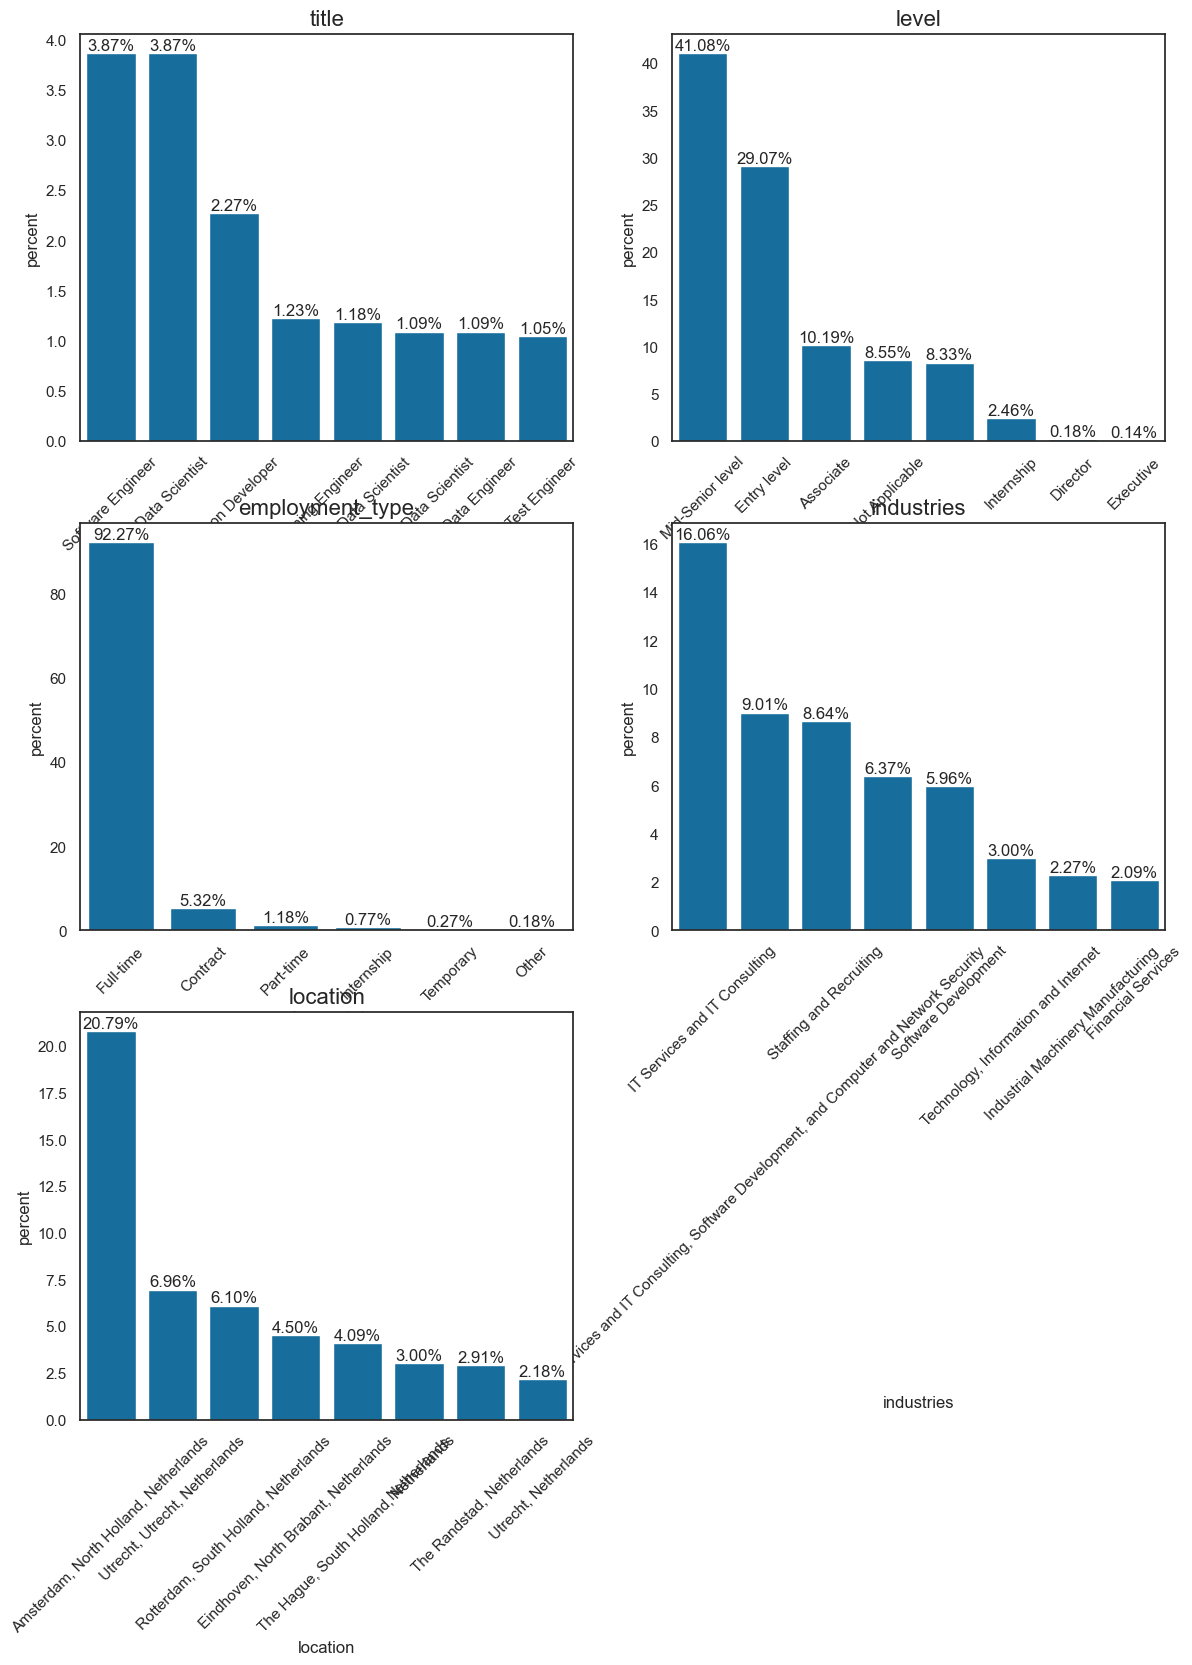

In [245]:
# Function to plot the distribution of categorical data
def cat_plot(columns, df, top_n=8):
    # Determine the number of rows needed for subplots
    n_cols = len(columns)
    n_rows = (n_cols + 1)//2

    # Create a figure with subplots arranged in a grid
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, 6* n_rows))
    axes = axes.flatten() 

    # Loop through the columns and create a plot for each 
    for idx, col in enumerate(columns):

        n = df[col].nunique()
        plot_n = min(top_n,n)
        top_categories = df[col].value_counts().head(plot_n).index
        ax = sns.countplot(data=df, x=col,order=top_categories, stat='percent', ax=axes[idx])
        
        ax.set_title(f"{col}",fontsize=16)
        ax.tick_params(axis='x', rotation=45)

        for bars in ax.containers:
            ax.bar_label(bars, fmt='{:.2f}%')
    
    # Hide any unused axes
    if (n_cols % 2) !=0:
        axes[-1].set_visible(False)



columns_to_plot = ['title', 'level','employment_type', 'industries', 'location']
cat_plot(columns=columns_to_plot, df=jobs_ds_df)

## Analysis of language requirement 

### Determine language requriment from text 

In [247]:
def lang_detect(text):
    try:
        ln = detect(text)
    except:
        ln = None
    return ln

jobs_ds_df['language'] = jobs_ds_df['text'].apply(lambda x: lang_detect(x)) 

In [248]:
jobs_ds_df['language'].value_counts()

nl       1110
en       1070
pl         12
zh-cn       2
de          2
fr          1
pt          1
Name: language, dtype: int64

In [249]:
jobs_ds_df[jobs_ds_df['language'] == 'pl'][['id','date']]

,id,date
166,3981394920,2024-07-23
306,3975919959,2024-07-13
367,3972001863,2024-07-10
534,3980826984,2024-07-20
735,3973564529,2024-07-11
786,3979704823,2024-07-18
918,3976437662,2024-07-16
1169,3979702964,2024-07-18
1546,3970727678,2024-07-09
1687,3981753245,2024-07-21


In [250]:
mask = jobs_ds_df['language'] == 'en'
jobs_ds_df.loc[mask, 'dutch_mention'] = jobs_ds_df.loc[mask, 'text'].str.contains('dutch', case=False)

In [251]:
jobs_ds_df['dutch_mention'].value_counts()

False    808
True     262
Name: dutch_mention, dtype: int64

In [252]:
jobs_ds_df['dutch_mention'].isnull().sum()

1128

In [212]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_dutch_sentences(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents if 'dutch' in sent.text.lower()]
    return ' '.join(sentences)
    #return sentences

In [215]:
text = "This inclusive employer is a member of myGwork \u2013 the largest global platform for the LGBTQ+ business community dutch..   At Booking.com, dutch data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We\u2019re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we can empower everyone to experience the world. \nRole description \n \n \nAs a Data Scientist in the Experimentation Science Team, you focus on scalable solutions to the company\u2019s most persistent challenges in decision making. You provide support to experimenters across the company, investigate problems and define clear solutions and requirements for their implementation, build proofs of concept and prototypes, and work closely with the engineering teams to support our product vision. The ability to write high quality, reproducible code and dig into technical product details and data pipelines is crucial to make your work impactfully landed in the Experimentation Tool, and enable solid decision making adoptable by a wide range of experimenters! \n \nAs a Data Scientist II, you\u2019ll take full ownership of the design and delivery of data science solutions, from ideation to implementation. You are expected to combine sound business understanding, data handling, programming, statistical modeling and data visualization to derive actionable information from broad sets of data while valuing pragmatism over perfection. \nIn the meantime, you are also part of a data science team, and work with partners throughout the company, to generate understanding, strategy and guide key decision making based on data. It involves applying suitable statistical data analysis and modeling methods to solve sophisticated business problems, independently identify and lead partners, and effectively communicate complex analysis results. \n \n \nKey Job Responsibilities And Duties \n \nResponsible for owning the design and delivery of entire Data Science solutions based on business requirements, bringing them from the initial idea-generation phase to implementation independently. \nResponsible for working autonomously on consuming data, preparing it for data science use, translating business problems to data stories and solving them effectively by applying suitable statistical data analysis and modeling methods. Leverages input from business stakeholders in all of the above to determine the right technical solutions to deliver customer value. \nResponsible for working primarily within the scope of their team to deliver work that informs business decisions for the product / business topic they currently work on, occasionally collaborating across multiple teams.  \nResponsible for designing and interpreting quantitative experiments to objectively guide key business decision making. \nResponsible for independently identifying and handling stakeholders in operational, project-based, and managerial roles. Effectively communicates, addresses collaborators' needs, and conveys complex analysis results in a clear manner. Begins to guide junior colleagues in stakeholder engagement. \nResponsible for being flexible in adopting existing internal and external Data Science approaches, proposing and spotting opportunities to apply new approaches and expanding their technical competencies and their peer\u2019s when a more efficient way presents itself. \nResponsible for leveraging Data Science for impact while learning to incorporate scalability, reproducibility and long term orientation in their work.  \nResponsible for acting as a force multiplier for junior peers in the team by actively helping them with their craft through means of coaching, mentoring and setting a good example. \nResponsible for contributing to the community of their area by supporting community projects aimed at making other data professional more effective, actively participating in community strengthening activities (ie. recruitment) and connecting with peers beyond their area. \nResponsible for collaborating with peers in related crafts (ie. Data Engineering), anticipating data needs to ensure smooth progress of their individual projects. \nResponsible for ensuring quality of their own work by validating it through peer review. \nResponsible for influencing business decisions within their specific area (ie. product team) \n \n \nRole Qualifications And Requirements \n \nProficient in Pyspark and general Python \nSolid understanding of statistical and hypothesis testing \nExperience working closely with product teams (not just PMs, but directly with developers/engineers) \nWillingness to dig deep into problems and behind the scenes data to support troubleshooting/bug fixing \nSolution oriented and result driven \nAble to brainstorm, peer review and drive research topics benefit Experimentation and Decision Making in both short and long term \nExcellent English communication skills, both written and verbal; the ability to convey your message to team members and other partners, clearly and gently. \nAchieve impacts as a great teammate, and maintain solid relationships with technical and non technical collaborators. \n \n \nThe Following Skills Are Assets For This Role \n \nKnowledgeable about statistical properties of (good) metrics, and ability to scalably test them \nCausal inference knowledge beyond A/B testing \nUnderstand the gist of scripts written in R \nExperience building libraries/modules in python \nFamiliarity with apis using is good, building/maintaining is great \nGood understanding of fundamental machine learning concepts \nSolid understanding of reporting/visualization techniques (e.g., Tableau, Graphite, Power BI, etc.) \n \n \nDEI: Diversity, Equity and Inclusion at Booking.com \n \nDiversity, Equity and Inclusion (DEI) have been a core part of our company culture since day one. This ongoing journey starts with our very own employees, who represent over 140 nationalities and a wide range of ethnic and social backgrounds, genders and sexual orientations. Take it from our Chief People Officer, Paulo Pisano: \u201cAt Booking.com, the diversity of our people doesn\u2019t just create a unique workplace, it also creates a better and more inclusive travel experience for everyone.\u201d \nWe will ensure that individuals with disabilities are provided reasonable adjustments to participate in the interview process. Please contact us to request adjustments. \n \n \nCareer Development Opportunities \n \nBi-annual performance conversations, company-wide mentoring program, and internal development opportunities \nUnlimited access to online learning platforms: Udemy, Coursera, LinkedIn learning, O'reilly \n \n \nApplication Process \n \nThe interview process for this role entails a total of 3 interviews. \n \n \nBooking.com is proud to be an equal opportunity workplace and is an affirmative action employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, gender, gender identity or expression, sexual orientation, national origin, genetics, disability, age, or veteran status. We strive to move well beyond traditional equal opportunity and work to create an environment that allows everyone to thrive. \n \nPre-Employment Screening \n \nIf your application is successful, your personal data may be used for a pre-employment screening check by a third party as permitted by applicable law. Depending on the vacancy and applicable law, a pre-employment screening may include employment history, education and other information (such as media information) that may be necessary for determining your qualifications and suitability for the position."
print(extract_dutch_sentences(text))

This inclusive employer is a member of myGwork – the largest global platform for the LGBTQ+ business community dutch..    At Booking.com, dutch data drives our decisions.


In [258]:
mask = jobs_ds_df['dutch_mention'] == True
jobs_ds_df.loc[mask, 'sentences_with_dutch'] = jobs_ds_df.loc[mask, 'text'].apply(extract_dutch_sentences)

In [265]:
sample_sentences = jobs_ds_df[~jobs_ds_df['sentences_with_dutch'].isnull()]['sentences_with_dutch'].sample(10)
sample_sentences

1076                                                                                                                                                                                                                                                                                                                                                                                                                                                       The Dutch team is experiencing strong growth and has now built up an impressive client portfolio, supported by and cooperating with colleagues from our international offices. Excellent English and Dutch verbal and written skills are required.. We are unable to provide a work permit for this positionNon-Dutch speaker will no be acceptedSia Partners is an equal opportunity employer.
1092    Requirements:- Bachelor's degree or higher in Computer Science, Engineering, or a related field.- Minimum of 5 years of hands-on experience in developing and deployi

In [341]:
from openai import OpenAI

# Helper function to get generated outputs from OpenAI model 
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def get_completion(prompt, model='gpt-4o-mini'):
    messages = [{ "role": "user", "content": prompt }]
    response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=0,
        )
    return response.choices[0].message.content

# Fuction to determine if the text requires dutch language  
def determine_dutch_requirement(text):

    prompt = f"""
              Your task is to determine if the job description {text} requires the Dutch language. 
              You can only choose one from the following list as your response and nothing else:
              ['Dutch required', 'Dutch is an asset', 'Other']
              Please don't enclose your response in single (') or double quotes(")
              """

    try:
        result = get_completion(prompt)
        return result
    except Exception as e:
        print(f"An error occured: {e}")
        return []


In [338]:
test = ['REF NL is considered to be the principal Dutch real estate lender, and our real estate knowledge is appreciated throughout the real estate investor market. You are fluent in English, Dutch is a pre.',  
'Language fluency in English AND French or German or Dutch.',
'Dutch or Russian language skills.. .',
'Click on the link to see the Dutch vacancy,. .']
for sent in test:
    response = determine_dutch_requirement(sent)
    print(f"{sent}:{response}")

REF NL is considered to be the principal Dutch real estate lender, and our real estate knowledge is appreciated throughout the real estate investor market. You are fluent in English, Dutch is a pre.:Dutch required
Language fluency in English AND French or German or Dutch.:Dutch is an asset
Dutch or Russian language skills.. .:Dutch required
Click on the link to see the Dutch vacancy,. .:Other


In [339]:
mask.sum()

262

In [342]:
jobs_ds_df.loc[mask, 'dutch_requirement'] = jobs_ds_df.loc[mask, 'sentences_with_dutch'].apply(determine_dutch_requirement)

In [343]:
jobs_ds_df['dutch_requirement'].value_counts()

Dutch required       168
Dutch is an asset     61
Other                 33
Name: dutch_requirement, dtype: int64

In [345]:
# Determine if Dutch is required based on 'language' and 'dutch_requirment'
jobs_ds_df['dutch_required'] = (jobs_ds_df['dutch_requirement'] == 'Dutch required') | (jobs_ds_df['language'] == 'nl')


In [346]:
jobs_ds_df['dutch_required'].value_counts()

True     1278
False     920
Name: dutch_required, dtype: int64

In [ ]:
# Determine if job is english based on 'language' and 'dutch_requirment'
jobs_ds_df['is_english'] = (~jobs_ds_df['dutch_requirement'] == 'Dutch required') & (jobs_ds_df['language'] == 'en')
jobs_ds_df['is_english'].value_counts()

## Analyze job titles

In [347]:
jobs_ds_df['title'].unique()

array(['Software Engineer C++', 'Engineering Data Engineer (Aveva)',
       'Rust Engineer DeFi Innovation (Remote)', ...,
       'Front-end developer | Headless development, Amsterdam',
       'Python Developer - Capelle a/d IJssel | ALTEN', 'Rust Engineer'],
      dtype=object)

In [348]:
from googletrans import Translator

def translate_text(text, language):
    try:
        translator = Translator(from_lang=language, to_lang="en")
        translation = translator.translate(text)
        return translation
    except Exception as e:
        print(f"An error occurred: {e}")
        return text
    
def get_english(text):
    language = lang_detect(text)
    if language =='en':
        return text
    else:
        return translate_text(text,language)

jobs_ds_df['english_title'] = jobs_ds_df['title'].apply(get_english)

In [359]:
jobs_ds_df['title'].value_counts()

Software Engineer                          85
Data Scientist                             85
Python Developer                           50
Machine Learning Engineer                  27
Senior Data Scientist                      26
                                           ..
Data Engineer – Openbaar Vervoer Sector     1
SDE-供应商开发工程师                                1
Junior Platform Engineer                    1
Software Engineer, Unimog                   1
Rust Engineer                               1
Name: title, Length: 1173, dtype: int64

In [358]:
jobs_ds_df['english_title'].value_counts()

Software Engineer                                91
Data Scientist                                   57
Python Developer                                 55
Machine Learning Engineer                        27
Test Engineer                                    26
                                                 ..
Python Developer - Eindhoven | ALTEN              1
Data Scientist II (Credit Risk)                   1
Backend Developer (Go / Postgres)                 1
AI (LLM & RAG) developer                          1
Python Developer - Capelle a/d IJssel | ALTEN     1
Name: english_title, Length: 1078, dtype: int64

In [360]:
# Function to group job titles
def group_title (title):
    title_lower = title.lower()
    if ('scientist' in title_lower) or ('data science' in title_lower):
        return 'Data Scientist'
    elif 'machine learning' in title_lower:
        return 'Machine Learning Engineer'
    elif 'developer' in title_lower:
        return 'Developer'
    # elif 'python' in title_lower:
    #     return 'Python Developer'
    elif 'engineer' in title_lower:
        return 'Engineer'
    else:
        return 'Other'

jobs_ds_df['title_group'] = jobs_ds_df['english_title'].apply(group_title)

print(jobs_ds_df[['title','title_group','english_title']].sample(10))

                          title     title_group  \
1938             Data Scientist           Other   
1130          Software Engineer        Engineer   
984           NLP Data Engineer        Engineer   
778   Software Engineer, Unimog        Engineer   
2043         Back End Developer       Developer   
804            Python Developer       Developer   
764               Test Engineer        Engineer   
327          Software Developer       Developer   
81               Data Scientist  Data Scientist   
869    Junior Venture Developer       Developer   

                                                                                                                                                                                            english_title  
1938  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  23 HOURS 13 MINUTES 32 SECONDS VISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE  
1130                          

In [169]:
df['title_group'].value_counts()

Engineer                     471
Developer                    320
Data Scientist               270
Machine Learning Engineer     69
Other                         52
Name: title_group, dtype: int64

In [170]:
df[df['title_group']=='Other']['title'].value_counts()

Engineer                                                                                                                4
Robot Programmeur, Warmenhuizen                                                                                         3
Reliability Programmeur, Wieringerwerf                                                                                  2
Programmeur, Den Haag                                                                                                   2
Stanowisko ds. rozliczeń                                                                                                2
Stanowisko ds. egzekucji                                                                                                2
AI / Neuromorphic Researcher                                                                                            2
SDE-ZY                                                                                                                  1
PLC progammeur          

/Users/jianisong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


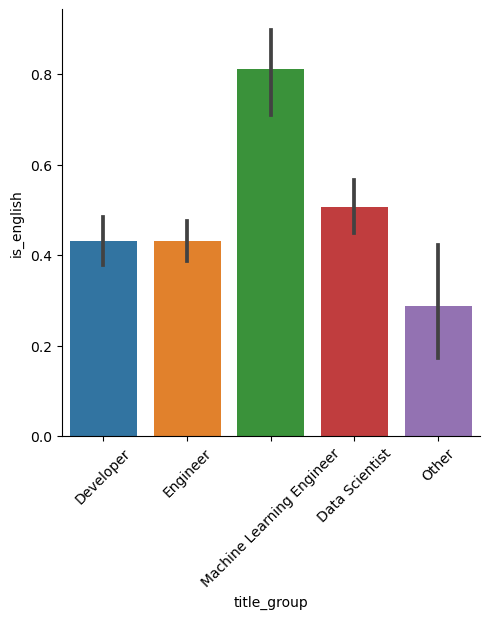

In [172]:
import seaborn as sns
g = sns.catplot(data=df, x = 'title_group', y='is_english', kind='bar')
g.set_xticklabels(rotation=45)